<a href="https://colab.research.google.com/github/DannyData1419/CM3710-ML-AI/blob/main/CW2_Classification_of_Car_Evaluation_Dataset_with_sklearn_%2B_TensorFlow_%2B_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CM3710 ML + AI Coureswork 2
## AI App for Car Evaluation Classification
# **Introduction**

Using Car Evaluation dataset, which can be found in public repository: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation, for this experiment we will predict the suitability of a vehicle based on the `class` target labels of:
* `vgood` very good
* `good` good
* `acc` acceptable
* `unacc` unacceptable 

We have 6 categorical nominal variables making up our features: 
* `buying` buying price
* `maint` price of the maintenance
* `doors` number of doors
* `persons` capacity in terms of persons to carry
* `lug_boot` the size of luggage boot
* `safety` estimated safety of the car 

Our data has 1728 observations and our task will be to compare 2 supervised classification algorithms, kNN and RandomForest.

In [ ]:
import pandas as pd

# Import data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
column_names = ['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety', 'class']

raw_dataset = pd.read_csv(url, names=column_names, skipinitialspace=True)
df = raw_dataset

# View sample
df.sample(10)

,buying,maintenance,doors,persons,lug_boot,safety,class
188,vhigh,high,4,more,big,high,unacc
1149,med,med,4,4,big,low,unacc
105,vhigh,vhigh,5more,more,big,low,unacc
403,vhigh,low,4,more,big,med,acc
239,vhigh,med,2,more,med,high,acc
907,med,vhigh,3,4,big,med,acc
692,high,med,3,4,big,high,acc
691,high,med,3,4,big,med,acc
858,high,low,5more,more,med,low,unacc
1052,med,high,4,more,big,high,acc


In [ ]:
# See the shape of data
df.shape

(1728, 7)

In [ ]:
# Provide distribution of numerical data, apply basic statistical computations, missing or NaN values automatically skipped
df.describe()

,buying,maintenance,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
# View columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1728 non-null   object
 1   maintenance  1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   lug_boot     1728 non-null   object
 5   safety       1728 non-null   object
 6   class        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
# Check missing values
df.isnull().sum()

buying         0
maintenance    0
doors          0
persons        0
lug_boot       0
safety         0
class          0
dtype: int64

In [ ]:
# Preprocess nominal features into numbers
import numpy as np

# One-hot-encode features
buying = pd.get_dummies(df['buying'])
maintenance = pd.get_dummies(df['maintenance'])
doors = pd.get_dummies(df['doors'])
persons = pd.get_dummies(df['persons'])
lug_boot = pd.get_dummies(df['lug_boot'])
safety = pd.get_dummies(df['safety'])

# Concat one-hot-encoded features to df
df = pd.concat((buying, maintenance, doors, persons, lug_boot, safety, df), axis=1)

# Drop original features from df 
df = df.drop(['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety'], axis=1)

# View sample of preprocessed dataset
df.sample(10)

,high,low,med,vhigh,high,low,med,vhigh,2,3,...,2,4,more,big,med,small,high,low,med,class
111,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,unacc
188,0,0,0,1,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,unacc
400,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,acc
142,0,0,0,1,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,unacc
1127,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,1,0,0,acc
660,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,unacc
1494,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,unacc
432,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,unacc
967,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,acc
1089,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,unacc


In [ ]:
# Replace labels with numbers
df['class_nums'] = df['class'].replace({'vgood':1, 'good':2, 'acc':3, 'unacc':4})

# Create target and features
X = df.drop(['class', 'class_nums'], axis=1).values
y = df['class_nums'].values 

# **KMeans in Scikit-learn**

In [ ]:
# Data for KMeans
print(f"Feature shape: {X.shape}\n{X}\n\nTarget shape: {y.shape}\n{y}")

Feature shape: (1728, 21)
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 ...
 [0 1 0 ... 0 1 0]
 [0 1 0 ... 0 0 1]
 [0 1 0 ... 1 0 0]]

Target shape: (1728,)
[4 4 4 ... 4 2 1]


In [ ]:
# Data config for KMeans
data = X # put our features into data
labels = y # put our target into labels
n_classes = np.unique(y).size # count number of unique class labels 
n_samples = X.shape[0] # count number of samples
n_features = X.shape[1] # count number of features

print(f'# Classes: {n_classes}, # Samples: {n_samples}, # Features: {n_features}')

# Classes: 4, # Samples: 1728, # Features: 21


In [ ]:
# We will first our evaluation benchmark. During this benchmark, we intend to compare different initialization methods for KMeans. 
# Our benchmark will:
    # create a pipeline which will scale the data using a StandardScaler;
    # train and time the pipeline fitting;
    # measure the performance of the clustering obtained via different metrics.

from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [ ]:
# We will compare three approaches:
    # an initialization using kmeans++. This method is stochastic and we will run the initialization 4 times;
    # a random initialization. This method is stochastic as well and we will run the initialization 4 times;
    # an initialization based on a PCA projection. Indeed, we will use the components of the PCA to initialize KMeans. 
    # This method is deterministic and a single initialization suffice.

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_classes, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_classes, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_classes).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_classes, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.115s	29376	0.004	0.002	0.003	0.001	0.000	0.111
random   	0.125s	29376	0.080	0.048	0.060	0.013	0.058	0.112
PCA-based	0.086s	31111	0.171	0.103	0.129	0.070	0.127	0.071
__________________________________________________________________________________


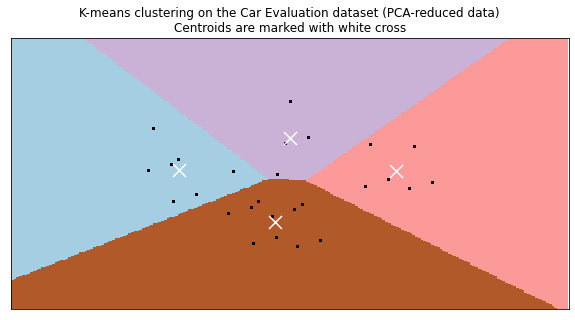

In [ ]:
# PCA allows to project the data from the original 21-dimensional space into a lower dimensional space. Subsequently, 
# we can use PCA to project into a 2-dimensional space and plot the data and the clusters in this new space.

import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_classes, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, plt.figure(figsize=(10,5)))
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the Car Evaluation dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# **kNN in Scikit-learn**
kNN is a similarity based learner that we will use to determine the number of nearest neighbours (k) for predicting the class label in our dataset. We will tune our hyperparameters, the class label will be predicted by a majority vote among the k nearest neighbours. We will evaluate by choosing a number of performance metrics, f1 score, accuracy, and error rate. kNN has been chosen for is explainability and interpretability.

In [ ]:
# Use text as class labels 
y = df['class'].values 

# Data for kNN
print(f"Features: {X.shape}\n{X}\n\nTarget: {y.shape}\n{y}")

Features: (1728, 21)
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 ...
 [0 1 0 ... 0 1 0]
 [0 1 0 ... 0 0 1]
 [0 1 0 ... 1 0 0]]

Target: (1728,)
['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']


In [ ]:
# View hyperparameters for KNeighborsClassifier

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# class sklearn.neighbors.KNeighborsClassifier(
# n_neighbors=5, 
# *, 
# weights='uniform', 
# algorithm='auto', 
# leaf_size=30, 
# p=2, 
# metric='minkowski', 
# metric_params=None, 
# n_jobs=None)

In [ ]:
# View error rate of selected k values 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8, stratify=y)

# k=3 k=5, k=7, k=9 - what disctance is being used by default
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn7 = KNeighborsClassifier(n_neighbors=7)
knn9 = KNeighborsClassifier(n_neighbors=9)

# Fit classifier to training data
knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)
knn7.fit(X_train, y_train)
knn9.fit(X_train, y_train)

# Print accuracy
print(f'k=3: {knn3.score(X_test, y_test)}')
print(f'k=5: {knn5.score(X_test, y_test)}')
print(f'k=7: {knn7.score(X_test, y_test)}')
print(f'k=9: {knn9.score(X_test, y_test)}')

# Error rate reducing as k increase

k=3: 0.8766859344894027
k=5: 0.8978805394990366
k=7: 0.9094412331406551
k=9: 0.9171483622350675


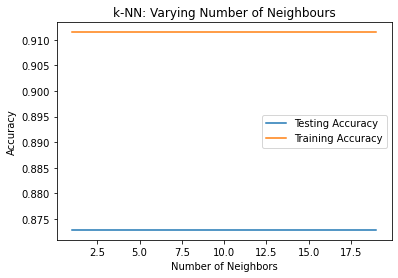

In [ ]:
# Overfitting and underfitting:
# Model complexity curve to compute and plot the training and testing accuracy scores for a variety of different neighbor values. 
# By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your 
# intuition for overfitting and underfitting.

import numpy as np
import matplotlib.pyplot as plt

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):

    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=len(neighbors))

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbours')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Text(0, 0.5, 'Error Rate')

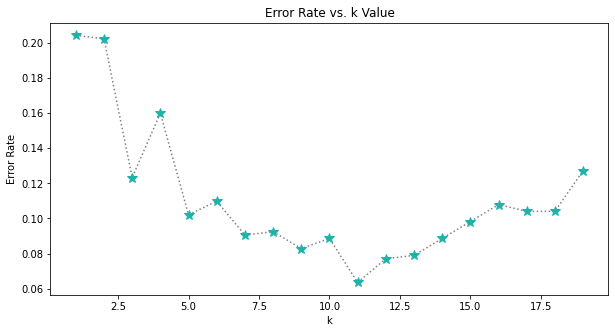

In [ ]:
# View error rate for K=1-20
error_rate = []
for i in range(1,20):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Create plot
colour = "lightseagreen" 

plt.figure(figsize=(10,5))
plt.plot(range(1,20), 
         error_rate, 
         color='grey', 
         linestyle=':', 
         marker='*',
         markerfacecolor=colour, 
         markeredgecolor=colour,
         markersize=10)
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

# Small k:
# When k is small, the algorithm can be more sensitive to outliers and can produce predictions that are highly influenced 
# by just a few data points. In this case, the algorithm is said to have a high degree of complexity and a low bias.

# Big k:
# When k is large, the algorithm tends to be more stable and produce predictions that are more representative of the 
# majority of the data points. The algorithm is said to have a low degree of complexity and a high bias.

In [ ]:
# Lets take a look at how the lowest k value compares to the highest
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(f'Confusion matrix for lowest k value: \n{confusion_matrix(y_test, pred)}\n')

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(f'Confusion matrix for highest k value: \n{confusion_matrix(y_test, pred)}')

# Confusion Matrix: 
# A confusion matrix is a table that summarizes the performance of a classifier. It gives a more detailed picture 
# of the performance of a classifier by breaking down the correct and incorrect predictions for each class.

# To do, add color 

Confusion matrix for lowest k value: 
[[ 79   3  26   7]
 [  7   6   6   2]
 [ 38   0 322   3]
 [  7   3   4   6]]

Confusion matrix for highest k value: 
[[110   0   5   0]
 [ 15   5   1   0]
 [  5   0 358   0]
 [  6   1   0  13]]


# **RandomForest in TensorFlow**





In [ ]:
pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 98.4 MB/s eta 0:00:00


In [ ]:
pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import math

In [ ]:
dataset_df = raw_dataset
dataset_df.sample(10)

,buying,maintenance,doors,persons,lug_boot,safety,class
1561,low,med,3,more,med,med,good
53,vhigh,vhigh,3,more,big,high,unacc
1115,med,med,3,2,big,high,unacc
424,vhigh,low,5more,more,small,med,unacc
557,high,high,2,4,big,high,acc
1345,low,vhigh,3,more,med,med,acc
813,high,low,4,2,med,low,unacc
1304,low,vhigh,2,2,big,high,unacc
210,vhigh,high,5more,more,med,low,unacc
1698,low,low,4,more,big,low,unacc


In [ ]:
# Encode the categorical labels as integers.
#
# Details:
# This stage is necessary if your classification label is represented as a
# string since Keras expects integer classification labels.
# When using `pd_dataframe_to_tf_dataset` (see below), this step can be skipped.

# Name of the label column.
label = "class"

classes = dataset_df[label].unique().tolist()
print(f"Label classes: {classes}")

dataset_df[label] = dataset_df[label].map(classes.index)

Label classes: ['unacc', 'acc', 'vgood', 'good']


In [ ]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, test_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

1194 examples in training, 534 examples for testing.


In [ ]:
# Convert pandas dataframe (pd.Dataframe) into tensorflow datasets (tf.data.Dataset):
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [ ]:
# Train RandomForestModel model
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmpz54ctj6z as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'buying': <tf.Tensor 'data:0' shape=(None,) dtype=string>, 'maintenance': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'doors': <tf.Tensor 'data_1:0' shape=(None,) dtype=string>, 'persons': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'lug_boot': <tf.Tensor 'data_2:0' shape=(None,) dtype=string>, 'safety': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>}
Label: Tensor("data_6:0", shape=(None,), dtype=int64)
Weights: None


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Normalized tensor features:
 {'buying': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data:0' shape=(None,) dtype=string>), 'maintenance': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'doors': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_1:0' shape=(None,) dtype=string>), 'persons': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_4:0' shape=(None,) dtype=string>), 'lug_boot': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_2:0' shape=(None,) dtype=string>), 'safety': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_5:0' shape=(None,) dtype=string>)}
Training dataset read in 0:00:05.165311. Found 1194 examples.
Training model...
Standard output detected as not visible to the user e.g. running in a notebook. Creating a training log redirection. If training gets stuck, try calling tfdf.keras.s

[INFO 2023-02-15T18:59:16.184459926+00:00 kernel.cc:756] Start Yggdrasil model training
[INFO 2023-02-15T18:59:16.184557197+00:00 kernel.cc:757] Collect training examples
[INFO 2023-02-15T18:59:16.184643026+00:00 kernel.cc:388] Number of batches: 2
[INFO 2023-02-15T18:59:16.184651317+00:00 kernel.cc:389] Number of examples: 1194
[INFO 2023-02-15T18:59:16.185289717+00:00 kernel.cc:774] Training dataset:
Number of records: 1194
Number of columns: 7

Number of columns by type:
	CATEGORICAL: 7 (100%)

Columns:

CATEGORICAL: 7 (100%)
	0: "__LABEL" CATEGORICAL integerized vocab-size:5 no-ood-item
	1: "buying" CATEGORICAL has-dict vocab-size:5 zero-ood-items most-frequent:"high" 317 (26.5494%)
	2: "doors" CATEGORICAL has-dict vocab-size:5 zero-ood-items most-frequent:"2" 316 (26.4657%)
	3: "lug_boot" CATEGORICAL has-dict vocab-size:4 zero-ood-items most-frequent:"small" 410 (34.3384%)
	4: "maintenance" CATEGORICAL has-dict vocab-size:5 zero-ood-items most-frequent:"high" 307 (25.7119%)
	5: "p

Model trained in 0:00:01.165506
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [ ]:
# Evaluate the model
model_1.compile(metrics=["accuracy", "error"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

ValueError: ignored

In [ ]:
tf.math.confusion_matrix(y_test, y_pred)

NameError: ignored

In [ ]:
# Prepare this model for TensorFlow Serving
model_1.save("/tmp/my_saved_model")

In [ ]:
# Plot model
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

In [ ]:
model_1.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (6):
	buying
	doors
	lug_boot
	maintenance
	persons
	safety

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.     "persons"  0.588829 ################
    2.      "safety"  0.521036 #############
    3.      "buying"  0.344366 #######
    4. "maintenance"  0.250951 ###
    5.    "lug_boot"  0.178964 #
    6.       "doors"  0.139059 

Variable Importance: NUM_AS_ROOT:
    1.     "persons" 158.000000 ################
    2.      "safety" 119.000000 ############
    3.      "buying" 22.000000 ##
    4. "maintenance"  1.000000 

Variable Importance: NUM_NODES:
    1.       "doors" 2750.000000 ################
    2.    "lu

In [ ]:
# The input features
model_1.make_inspector().features()

["buying" (4; #1),
 "doors" (4; #2),
 "lug_boot" (4; #3),
 "maintenance" (4; #4),
 "persons" (4; #5),
 "safety" (4; #6)]

In [ ]:
# The feature importances
model_1.make_inspector().variable_importances()

{'NUM_NODES': [("doors" (4; #2), 2750.0),
  ("lug_boot" (4; #3), 2678.0),
  ("maintenance" (4; #4), 2400.0),
  ("buying" (4; #1), 1983.0),
  ("safety" (4; #6), 1809.0),
  ("persons" (4; #5), 1047.0)],
 'NUM_AS_ROOT': [("persons" (4; #5), 158.0),
  ("safety" (4; #6), 119.0),
  ("buying" (4; #1), 22.0),
  ("maintenance" (4; #4), 1.0)],
 'INV_MEAN_MIN_DEPTH': [("persons" (4; #5), 0.5888293887513104),
  ("safety" (4; #6), 0.5210361442140783),
  ("buying" (4; #1), 0.3443656225316147),
  ("maintenance" (4; #4), 0.2509507250777891),
  ("lug_boot" (4; #3), 0.1789644061321216),
  ("doors" (4; #2), 0.139059474957453)],
 'SUM_SCORE': [("safety" (4; #6), 86531.20187366521),
  ("persons" (4; #5), 61130.02696684035),
  ("maintenance" (4; #4), 44849.00371820858),
  ("buying" (4; #1), 44276.84932907962),
  ("lug_boot" (4; #3), 31663.315494167386),
  ("doors" (4; #2), 13164.993162613537)]}

In [ ]:
# The feature importances
model_1.make_inspector().variable_importances()

{'INV_MEAN_MIN_DEPTH': [("persons" (4; #5), 0.5888293887513104),
  ("safety" (4; #6), 0.5210361442140783),
  ("buying" (4; #1), 0.3443656225316147),
  ("maintenance" (4; #4), 0.2509507250777891),
  ("lug_boot" (4; #3), 0.1789644061321216),
  ("doors" (4; #2), 0.139059474957453)],
 'NUM_NODES': [("doors" (4; #2), 2750.0),
  ("lug_boot" (4; #3), 2678.0),
  ("maintenance" (4; #4), 2400.0),
  ("buying" (4; #1), 1983.0),
  ("safety" (4; #6), 1809.0),
  ("persons" (4; #5), 1047.0)],
 'NUM_AS_ROOT': [("persons" (4; #5), 158.0),
  ("safety" (4; #6), 119.0),
  ("buying" (4; #1), 22.0),
  ("maintenance" (4; #4), 1.0)],
 'SUM_SCORE': [("safety" (4; #6), 86531.20187366521),
  ("persons" (4; #5), 61130.02696684035),
  ("maintenance" (4; #4), 44849.00371820858),
  ("buying" (4; #1), 44276.84932907962),
  ("lug_boot" (4; #3), 31663.315494167386),
  ("doors" (4; #2), 13164.993162613537)]}

In [ ]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=1194, accuracy=0.9597989949748744, loss=0.09462680388983008, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
model_1.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=456, accuracy=0.9364035087719298, loss=2.2922497715866355, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=1185, accuracy=0.9493670886075949, loss=0.5253288569958401, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=1194, accuracy=0.9530988274706867, loss=0.26629009154598715, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=1194, accuracy=0.9514237855946399, loss=0.15388029182276733, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=1194, accuracy=0.9539363484087102, loss=0.1530254328969735, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=1194, accuracy=0.9564489112227805, loss=0.12566589220260055, 

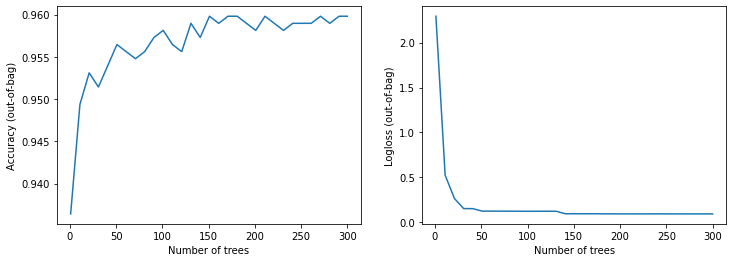

In [ ]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

# **Results of Experimentation**: 
"Performance metrics visualised using graphs or tables are very much encouraged. Comparison of the two algorithms results. Hypothesis to explain algorithm performance. (Max 100 words)."

In [ ]:
print(f'Classification report with highest k value:  \n{classification_report(y_test,pred)}')

# Classification report:
# Precision: Precision is a metric that measures the accuracy of positive predictions. It is the number of true positive predictions 
# divided by the sum of true positive and false positive predictions.

# Recall: Recall is a metric that measures the proportion of positive cases that were correctly identified by the classifier. 
# It is calculated as the number of true positive predictions divided by the sum of true positive predictions and false negative predictions.

# F1 Score: The F1 score is a weighted average of precision and recall, where the weighting depends on the balance between 
# precision and recall. It is a single number that summarizes the performance of the classifier.

# Accuracy: This is the most commonly used metric, which measures the proportion of correct predictions out of all predictions made. 
# It can be calculated as the number of correct predictions divided by the total number of predictions.

Classification report with highest k value:  
              precision    recall  f1-score   support

         acc       0.81      0.96      0.88       115
        good       0.83      0.24      0.37        21
       unacc       0.98      0.99      0.98       363
       vgood       1.00      0.65      0.79        20

    accuracy                           0.94       519
   macro avg       0.91      0.71      0.75       519
weighted avg       0.94      0.94      0.93       519



---
# ***Additional stuff***

# **XAI**

# **Gradient Boosted Trees Model in TensorFlow**

In [ ]:
# Train model
# Specify the model.
model_2 = tfdf.keras.GradientBoostedTreesModel(verbose=2)

# Train the model.
model_2.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmp342c29ti as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'buying': <tf.Tensor 'data:0' shape=(None,) dtype=string>, 'maintenance': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'doors': <tf.Tensor 'data_1:0' shape=(None,) dtype=string>, 'persons': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'lug_boot': <tf.Tensor 'data_2:0' shape=(None,) dtype=string>, 'safety': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>}
Label: Tensor("data_6:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'buying': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data:0' shape=(None,) dtype=string>), 'maintenance': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'doors': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_1:0' shape=(None,) dtype=string>), 'persons': SemanticTen

[INFO 2023-02-15T09:47:48.63788547+00:00 kernel.cc:756] Start Yggdrasil model training
[INFO 2023-02-15T09:47:48.637929232+00:00 kernel.cc:757] Collect training examples
[INFO 2023-02-15T09:47:48.638045058+00:00 kernel.cc:388] Number of batches: 2
[INFO 2023-02-15T09:47:48.638060931+00:00 kernel.cc:389] Number of examples: 1215
[INFO 2023-02-15T09:47:48.638859143+00:00 kernel.cc:774] Training dataset:
Number of records: 1215
Number of columns: 7

Number of columns by type:
	CATEGORICAL: 7 (100%)

Columns:

CATEGORICAL: 7 (100%)
	0: "__LABEL" CATEGORICAL integerized vocab-size:5 no-ood-item
	1: "buying" CATEGORICAL has-dict vocab-size:5 zero-ood-items most-frequent:"high" 310 (25.5144%)
	2: "doors" CATEGORICAL has-dict vocab-size:5 zero-ood-items most-frequent:"4" 314 (25.8436%)
	3: "lug_boot" CATEGORICAL has-dict vocab-size:4 zero-ood-items most-frequent:"big" 412 (33.9095%)
	4: "maintenance" CATEGORICAL has-dict vocab-size:5 zero-ood-items most-frequent:"vhigh" 307 (25.2675%)
	5: "per

Model trained in 0:00:01.011989
Compiling model...
Model compiled.


In [ ]:
# Evaluate the model
model_2.compile(metrics=["accuracy"])
evaluation = model_2.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 171ms/step - loss: 0.0000e+00 - accuracy: 0.9747

loss: 0.0000
accuracy: 0.9747


In [ ]:
# Prepare this model for TensorFlow Serving
model_2.save("/tmp/my_saved_model")

In [ ]:
# Plot model
tfdf.model_plotter.plot_model_in_colab(model_2, tree_idx=0, max_depth=3)

In [ ]:
model_2.summary()

Model: "gradient_boosted_trees_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (6):
	buying
	doors
	lug_boot
	maintenance
	persons
	safety

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.      "safety"  0.362092 ################
    2.      "buying"  0.329539 ############
    3. "maintenance"  0.296109 #########
    4.     "persons"  0.251154 #####
    5.    "lug_boot"  0.236807 ###
    6.       "doors"  0.200525 

Variable Importance: NUM_AS_ROOT:
    1.      "safety" 86.000000 ################
    2. "maintenance" 70.000000 ############
    3.      "buying" 64.000000 ###########
    4.    "lug_boot" 44.000000 ######
    5.     "persons" 15.000000 
    6.       "doors" 13.00

In [ ]:
# The input features
model_2.make_inspector().features()

["buying" (4; #1),
 "doors" (4; #2),
 "lug_boot" (4; #3),
 "maintenance" (4; #4),
 "persons" (4; #5),
 "safety" (4; #6)]

In [ ]:
# The feature importances
model_2.make_inspector().variable_importances()

{'INV_MEAN_MIN_DEPTH': [("safety" (4; #6), 0.3620922042610062),
  ("buying" (4; #1), 0.32953873607315826),
  ("maintenance" (4; #4), 0.29610880771784825),
  ("persons" (4; #5), 0.25115425947216374),
  ("lug_boot" (4; #3), 0.2368067870344217),
  ("doors" (4; #2), 0.2005253546704904)],
 'NUM_AS_ROOT': [("safety" (4; #6), 86.0),
  ("maintenance" (4; #4), 70.0),
  ("buying" (4; #1), 64.0),
  ("lug_boot" (4; #3), 44.0),
  ("persons" (4; #5), 15.0),
  ("doors" (4; #2), 13.0)],
 'SUM_SCORE': [("persons" (4; #5), 640.0950646477969),
  ("safety" (4; #6), 479.24252862048456),
  ("maintenance" (4; #4), 324.69365488093115),
  ("buying" (4; #1), 278.0769238079513),
  ("lug_boot" (4; #3), 181.23599224166438),
  ("doors" (4; #2), 41.43916139688628)],
 'NUM_NODES': [("safety" (4; #6), 1741.0),
  ("buying" (4; #1), 1690.0),
  ("maintenance" (4; #4), 1624.0),
  ("lug_boot" (4; #3), 1422.0),
  ("persons" (4; #5), 1402.0),
  ("doors" (4; #2), 787.0)]}

In [ ]:
model_2.make_inspector().evaluation()

Evaluation(num_examples=None, accuracy=0.978723406791687, loss=0.045125432312488556, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
model_2.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=None, accuracy=0.8829787373542786, loss=1.179673433303833, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=2, evaluation=Evaluation(num_examples=None, accuracy=0.8723404407501221, loss=1.0278410911560059, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=3, evaluation=Evaluation(num_examples=None, accuracy=0.8723404407501221, loss=0.9093832969665527, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=4, evaluation=Evaluation(num_examples=None, accuracy=0.8723404407501221, loss=0.8135404586791992, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=5, evaluation=Evaluation(num_examples=None, accuracy=0.8723404407501221, loss=0.7336495518684387, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=6, evaluation=Evaluation(num_examples=None, accuracy=0.8723404407501221, loss=0.663750946521759, rmse=None

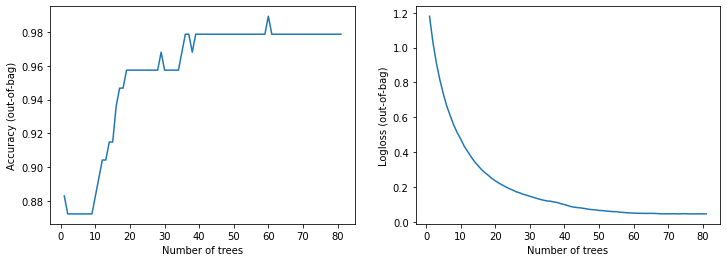

In [ ]:
import matplotlib.pyplot as plt

logs = model_2.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

# **Neural Network in Keras**

In [ ]:
import pandas as pd

# Import data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
column_names = ['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety', 'class']

raw_dataset = pd.read_csv(url, names=column_names, skipinitialspace=True)
df = raw_dataset

# Preprocess nominal features into numbers
import numpy as np

# One-hot-encode features
buying = pd.get_dummies(df['buying'])
maintenance = pd.get_dummies(df['maintenance'])
doors = pd.get_dummies(df['doors'])
persons = pd.get_dummies(df['persons'])
lug_boot = pd.get_dummies(df['lug_boot'])
safety = pd.get_dummies(df['safety'])

# Concat one-hot-encoded features to df
df = pd.concat((buying, maintenance, doors, persons, lug_boot, safety, df), axis=1)

# Drop original features from df 
df = df.drop(['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety'], axis=1)

# Create target and features
X = df.drop('class', axis=1).values
y = df['class'].values

print(f"Feature: {X.shape} \n{X}")

Feature: (1728, 21) 
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 ...
 [0 1 0 ... 0 1 0]
 [0 1 0 ... 0 0 1]
 [0 1 0 ... 1 0 0]]


In [ ]:
# One-hot target for keras NN
y = pd.get_dummies(y)
print(y)

      acc  good  unacc  vgood
0       0     0      1      0
1       0     0      1      0
2       0     0      1      0
3       0     0      1      0
4       0     0      1      0
...   ...   ...    ...    ...
1723    0     1      0      0
1724    0     0      0      1
1725    0     0      1      0
1726    0     1      0      0
1727    0     0      0      1

[1728 rows x 4 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create train + test split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8, stratify=y)

model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the data
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
87/87 [==============================] - 2s 5ms/step - loss: 0.5418 - accuracy: 0.5557 - val_loss: 0.3756 - val_accuracy: 0.6994
Epoch 2/100
87/87 [==============================] - 0s 3ms/step - loss: 0.3344 - accuracy: 0.7019 - val_loss: 0.2991 - val_accuracy: 0.6965
Epoch 3/100
87/87 [==============================] - 0s 3ms/step - loss: 0.2611 - accuracy: 0.7438 - val_loss: 0.2338 - val_accuracy: 0.7861
Epoch 4/100
87/87 [==============================] - 0s 3ms/step - loss: 0.2003 - accuracy: 0.8379 - val_loss: 0.1907 - val_accuracy: 0.8208
Epoch 5/100
87/87 [==============================] - 0s 3ms/step - loss: 0.1657 - accuracy: 0.8524 - val_loss: 0.1671 - val_accuracy: 0.8468
Epoch 6/100
87/87 [==============================] - 0s 3ms/step - loss: 0.1454 - accuracy: 0.8719 - val_loss: 0.1492 - val_accuracy: 0.8468
Epoch 7/100
87/87 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.8806 - val_loss: 0.1359 - val_accuracy: 0.8584
Epoch 8/100
8

In [ ]:
# Model evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

11/11 - 0s - loss: 0.0123 - accuracy: 0.9942 - 42ms/epoch - 4ms/step
Test accuracy: 0.9942196607589722
